In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from utils import require

In [2]:
from optimization.range.MethodSven import method_sven_iterations_list
from optimization.range.MethodSven import method_sven

from optimization.range.SearchDichotomous import search_method_dichotomous_iterations_list
from optimization.range.SearchDichotomous import search_method_dichotomous_iterations_label
from optimization.range.SearchDichotomous import search_dichotomous

from optimization.range.HalvingMethod import halving_method
from optimization.range.HalvingMethod import halving_method_iterations_list
from optimization.range.HalvingMethod import halving_method_iterations_label

from optimization.range.SearchGoldenSection import search_golden_section_iterations_list
from optimization.range.SearchGoldenSection import log_search_golden_section_iterations_list

from optimization.range.SearchPitchAdaptation import search_pitch_adaptation
from optimization.range.SearchPitchAdaptation import search_pitch_adaptation_iterations_list
from optimization.range.SearchPitchAdaptation import search_pitch_adaptation_iterations_label

In [3]:
x0 = 3.0
h = 2.0
n = 200
f = lambda x: 20 * (x + 5).__pow__(2)

In [4]:
def print_iterations(iterations, f=None, range=None, columns=['x', 'y']):
    iterations = pd.DataFrame(iterations, columns=columns)
    if f is not None and range is not None:
        x = np.linspace(range[0], range[1])
        y = f(x)
        plt.plot(x, y)
    plt.plot(iterations['x'], iterations['y'])
    plt.show()
    return iterations

In [13]:
# method_sven_iterations_list = []
#
#
# def method_sven(x0: float, h: float, f, n: int = 200):
#     method_sven_iterations_list.clear()
#
#     def inner_method_sven(x0: float, h: float, f, n: int = 200):
#         x1 = x0 + h
#         f0 = f(x0)
#         f1 = f(x1)
#         method_sven_iterations_list.append([x1, f1, h])
#         if f1 < f0:
#             return inner_method_sven(x1, h * 2, f, n)
#         else:
#             return [x0, x1]
#
#     x1 = x0 + h
#     f0 = f(x0)
#     f1 = f(x1)
#     method_sven_iterations_list.append([x1, f1, h])
#     if f1 < f0:
#         return inner_method_sven(x0, h * 2, f, n - 1)
#     else:
#         return inner_method_sven(x0, h * -1, f, n - 1)

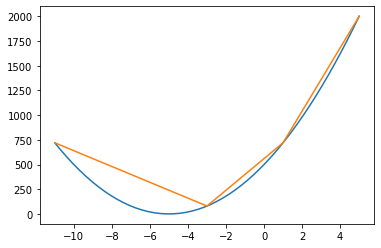

,x,y,h
0,5.0,2000.0,2.0
1,1.0,720.0,-2.0
2,-3.0,80.0,-4.0
3,-11.0,720.0,-8.0


In [5]:
nim = method_sven(x0, h, f, n)
print_iterations(method_sven_iterations_list, f=f, range=[-11, 5], columns=['x', 'y', 'h'])

In [15]:
# search_method_dichotomous_iterations_list = []
# search_method_dichotomous_iterations_label = ['x', 'y', 'start_x', 'end_x', 'left_x', 'right_x', "center_x", 'iter']
#
#
# def search_dichotomous(f, start_x, end_x, epsilon=0.01, iter=500):
#     search_method_dichotomous_iterations_list.clear()
#
#     def search_method_dichotomous_inner(f, start_x, end_x, epsilon, iter):
#         if abs(end_x - start_x) < epsilon or iter < 0:
#             return [start_x, end_x]
#         else:
#             center_x = start_x + (end_x - start_x) / 2
#             left_x = center_x - epsilon / 2.1
#             right_x = center_x + epsilon / 2.1
#             search_method_dichotomous_iterations_list.append(
#                 [center_x, f(center_x), start_x, end_x, left_x, right_x, center_x, iter]
#             )
#             if f(left_x) < f(right_x):
#                 return search_method_dichotomous_inner(f, start_x, right_x, epsilon, iter - 1)
#             else:
#                 return search_method_dichotomous_inner(f, left_x, end_x, epsilon, iter - 1)
#
#     return search_method_dichotomous_inner(f, start_x, end_x, epsilon, iter)

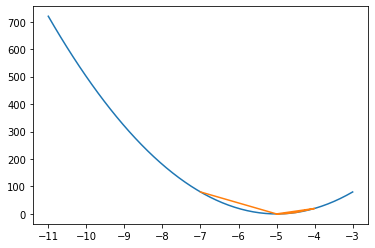

,x,y,start_x,end_x,left_x,right_x,center_x,iter
0,-7.000000,8.000000e+01,-11.000000,-3.000000,-7.004762,-6.995238,-7.000000,500
1,-5.002381,1.133787e-04,-7.004762,-3.000000,-5.007143,-4.997619,-5.002381,499
2,-4.003571,1.985740e+01,-5.007143,-3.000000,-4.008333,-3.998810,-4.003571,498
3,-4.502976,4.940653e+00,-5.007143,-3.998810,-4.507738,-4.498214,-4.502976,497
4,-4.752679,1.223358e+00,-5.007143,-4.498214,-4.757440,-4.747917,-4.752679,496
5,-4.877530,2.999792e-01,-5.007143,-4.747917,-4.882292,-4.872768,-4.877530,495
6,-4.939955,7.210718e-02,-5.007143,-4.872768,-4.944717,-4.935193,-4.939955,494
7,-4.971168,1.662551e-02,-5.007143,-4.935193,-4.975930,-4.966406,-4.971168,493
8,-4.986775,3.498249e-03,-5.007143,-4.966406,-4.991536,-4.982013,-4.986775,492
9,-4.994578,5.880153e-04,-5.007143,-4.982013,-4.999340,-4.989816,-4.994578,491


In [6]:
range = method_sven(x0, h, f, n)
result = search_dichotomous(f, range[1], range[0])
print_iterations(search_method_dichotomous_iterations_list, f=f, range=range,
                 columns=search_method_dichotomous_iterations_label)

In [7]:
numbers_fibonacci = [1, 1]


def get_numbers_fibonacci(n):
    size = len(numbers_fibonacci)
    if n < size:
        return numbers_fibonacci[0:n + 1]
    numbers_fibonacci.append(numbers_fibonacci[size - 1] + numbers_fibonacci[size - 2])
    return get_numbers_fibonacci(n)


def first_divide_fibonacci(f, start_x, end_x, fib_n1, fib_n2):
    require(start_x < end_x)
    fib_n3 = fib_n1 + fib_n2
    delta = end_x - start_x
    left_x = start_x + (delta * (fib_n1 / fib_n3))
    right_x = start_x + (delta * (fib_n2 / fib_n3))
    if f(left_x) < f(right_x):
        return [start_x, left_x, right_x]
    else:
        return [left_x, right_x, end_x]


In [7]:
# get_numbers_fibonacci(6)
range = method_sven(x0, h, f, n)
# numbers_fibonacci
first_divide_fibonacci(f, range[1], range[0], 5, 8)
# len(numbers_fibonacci)
# range[1]<range[0]

NameError: name 'first_divide_fibonacci' is not defined

In [21]:
# halving_method_iterations_list = []
# halving_method_iterations_label = ['x', 'y', 'start_x', 'end_x', 'iter']
#
# log_halving_method_iterations_list = []
# log_halving_method_iterations_label = ['start_x', 'end_x', 'left', "center", 'right', 'iter']
#
#
# def center_range(X):
#     return X[0] + (X[0] - X[1]) / 2
#
#
# def halving_method(f, start_x, end_x, epsilon=0.01, iter=500):
#     def halving_method_inner(f, start_x, end_x, center, epsilon, iter):
#         halving_method_iterations_list.append(
#             [center[0], center[1], start_x, end_x, iter]
#         )
#         if abs(end_x - start_x) < epsilon or iter < 0:
#             return center
#         left_center_x = center_range([start_x, center[0]])
#         right_center_x = center_range([center[0], end_x])
#
#         left_center = [left_center_x, f(left_center_x)]
#         right_center = [right_center_x, f(right_center_x)]
#
#         if left_center[1] < center[1]:
#             return halving_method_inner(f, start_x, center[0], left_center, epsilon, iter - 1)
#         if center[1] > right_center[1]:
#             return halving_method_inner(f, center[0], end_x, right_center, epsilon, iter - 1)
#         if left_center[1] >= center[1] <= right_center[1]:
#             return halving_method_inner(f, left_center[0], right_center[0], center, epsilon, iter - 1)
#         raise ValueError('illegal argument exception')
#
#     center_x = center_range([start_x, end_x])
#     left_center_x = center_range([start_x, center_x])
#     right_center_x = center_range([center_x, end_x])
#
#     center = [center_x, f(center_x)]
#     left_center = [left_center_x, f(left_center_x)]
#     right_center = [right_center_x, f(right_center_x)]
#
#     log_halving_method_iterations_list.append(
#         [start_x, end_x, left_center, center, right_center,iter]
#     )
#     if left_center[1] < center[1]:
#         return halving_method_inner(f, start_x, center[0], left_center, epsilon, iter - 1)
#     if center[1] > right_center[1]:
#         return halving_method_inner(f, center[0], end_x, right_center, epsilon, iter - 1)
#     if left_center[1] >= center[1] <= right_center[1]:
#         return halving_method_inner(f, left_center[0], right_center[0], center, epsilon, iter - 1)
#     raise ValueError('illegal argument exception')

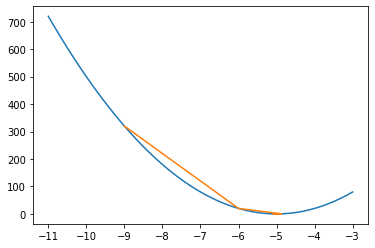

,x,y,start_x,end_x,iter
0,-9.000000,320.000000,-11.000000,-15.000000,499
1,-6.000000,20.000000,-9.000000,-15.000000,498
2,-6.000000,20.000000,-10.500000,-1.500000,497
3,-6.000000,20.000000,-12.750000,-8.250000,496
4,-4.875000,0.312500,-6.000000,-8.250000,495
5,-4.875000,0.312500,-6.562500,-3.187500,494
6,-4.875000,0.312500,-7.406250,-5.718750,493
7,-4.875000,0.312500,-8.671875,-4.453125,492
8,-5.085938,0.147705,-4.875000,-4.453125,491
9,-5.085938,0.147705,-4.769531,-5.402344,490


In [7]:
range = method_sven(x0, h, f, n)
result = halving_method(f, range[1], range[0])
print_iterations(halving_method_iterations_list, f=f, range=range,
                 columns=halving_method_iterations_label)

In [15]:
golden_section = ((5 ** (0.5) + 1) / 2)

search_golden_section_iterations_list = []
search_golden_section_iterations_label = ['x', 'y', 'start_x', 'end_x', 'iter']

log_search_golden_section_iterations_list = []
log_search_golden_section_iterations_label = ['start_x', 'end_x', 'left', "center", 'right', 'iter']


def search_golden_section(f, start_x, end_x, epsilon=0.001, iter=500):
    search_golden_section_iterations_list.clear()

    def search_golden_section_inner(f, start_x, end_x, left, right, epsilon, iter):
        search_golden_section_iterations_list.append(
            [(end_x + start_x) / 2, f((end_x + start_x) / 2), start_x, end_x, iter]
        )
        if abs(end_x - start_x) < epsilon or iter < 0:
            return [(end_x + start_x) / 2, f((end_x + start_x) / 2)]
        if left is None:
            left_x = end_x - (end_x - start_x) / golden_section
            left = [left_x, f(left_x)]
        if right is None:
            right_x = start_x + (end_x - start_x) / golden_section
            right = [right_x, f(right_x)]
        log_search_golden_section_iterations_list.append(
            [start_x, end_x, left, right, epsilon, iter]
        )
        if left[1] < right[1]:
            return search_golden_section_inner(f, start_x, right[0], None, left, epsilon, iter - 1)
        else:
            return search_golden_section_inner(f, left[0], end_x, right, None, epsilon, iter - 1)

    left_x = end_x - (end_x - start_x) / golden_section
    right_x = start_x + (end_x - start_x) / golden_section

    left = [left_x, f(left_x)]
    right = [right_x, f(right_x)]
    search_golden_section_iterations_list.append(
        [(end_x + start_x) / 2, f((end_x + start_x) / 2), start_x, end_x, iter]
    )
    if abs(left[1]) < abs(right[1]):
        return search_golden_section_inner(f, start_x, right_x, None, left, epsilon, iter - 1)
    else:
        return search_golden_section_inner(f, left_x, end_x, right, None, epsilon, iter - 1)

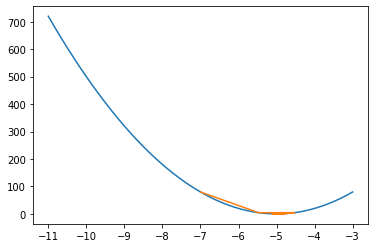

,x,y,start_x,end_x,iter
0,-7.000000,8.000000e+01,-11.000000,-3.000000,500
1,-5.472136,4.458247e+00,-7.944272,-3.000000,499
2,-4.527864,4.458247e+00,-6.055728,-3.000000,498
3,-5.111456,2.484496e-01,-6.055728,-4.167184,497
4,-4.750776,1.242248e+00,-5.334369,-4.167184,496
5,-4.973689,1.384562e-02,-5.334369,-4.613009,495
6,-5.111456,2.484496e-01,-5.334369,-4.888544,494
7,-5.026311,1.384562e-02,-5.164079,-4.888544,493
8,-4.973689,1.384562e-02,-5.058834,-4.888544,492
9,-5.006211,7.715901e-04,-5.058834,-4.953589,491


In [16]:
range = method_sven(x0, h, f, n)
result = search_golden_section(f, range[1], range[0])
# print(log_search_golden_section_iterations_list)
print_iterations(search_golden_section_iterations_list, f=f, range=[-11, -3],
                 columns=search_golden_section_iterations_label)
# range

In [8]:
pd.DataFrame(log_search_golden_section_iterations_list)

""


In [35]:
# search_pitch_adaptation_iterations_list = []
# search_pitch_adaptation_iterations_label = ['x', 'y', 'step', 'step_coef', 'iter']
#
#
# # log_search_golden_section_iterations_list = []
# # log_search_golden_section_iterations_label = ['start_x', 'end_x', 'left', "center", 'right', 'iter']
#
#
# def search_pitch_adaptation(f, start_x, step, epsilon=0.1, iter=500):
#     search_golden_section_iterations_list.clear()
#     def next_step_coef(coef, Y):
#         if Y[1] < Y[0] and coef >= 0.5:
#             return 2
#         if Y[1] < Y[0] and coef < 0.5:
#             return 0.5
#         if Y[1] >= Y[0] and coef == 2:
#             return 0.25
#         if Y[1] >= Y[0] and coef != 2:
#             return -0.5
#
#     def search_pitch_adaptation_inner(f, start, step, step_coef, epsilon, iter):
#         search_golden_section_iterations_list.append(
#             [start[0], start[1], step, step_coef, iter]
#         )
#         if abs(step) < epsilon or iter < 0:
#             return start
#
#         next_x = start[0] + step
#         next = [next_x, f(next_x)]
#
#         next_sc = next_step_coef(step_coef, [start[1], next[1]])
#
#         if next[1] < start[1]:
#             return search_pitch_adaptation_inner(f, next, step * next_sc, next_sc, epsilon, iter - 1)
#         else:
#             return search_pitch_adaptation_inner(f, start, step * next_sc, next_sc, epsilon, iter - 1)
#
#     return search_pitch_adaptation_inner(f, [start_x, f(start_x)], step, 0, epsilon, iter - 1)

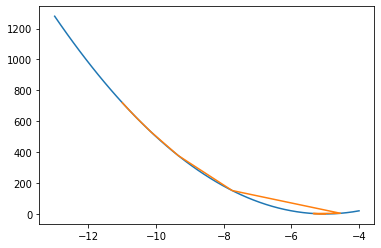

,x,y,step,step_coef,iter
0,-11.00,720.00,0.100000,0.00,499
1,-10.90,696.20,0.050000,0.50,498
2,-10.85,684.45,0.100000,2.00,497
3,-10.75,661.25,0.200000,2.00,496
4,-10.55,616.05,0.400000,2.00,495
5,-10.15,530.45,0.800000,2.00,494
6,-9.35,378.45,1.600000,2.00,493
7,-7.75,151.25,3.200000,2.00,492
8,-4.55,4.05,6.400000,2.00,491
9,-4.55,4.05,1.600000,0.25,490


In [17]:
res = search_pitch_adaptation(f, -11, 0.1, 0.001)
# print_iterations(search_golden_section_iterations_list)
print_iterations(search_pitch_adaptation_iterations_list, f=f, range=[-13, -4],
                 columns=search_pitch_adaptation_iterations_label)
# res
# search_golden_section_iterations_list